# Филогенетик шинжилгээ (Phylogenetic Analysis)

## 1. Introduction: Problem Definition and Relevance 

**Филогенетик (Phylogenetic): Төрөл зүйлсийн хувьслын түүх болон хамаарлыг судалдаг.**


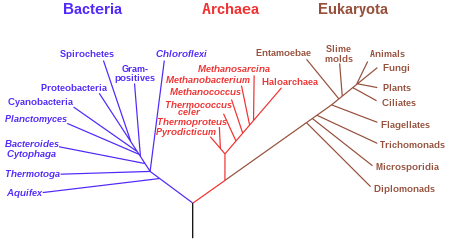

### Филогенетикийн мод

- **Навч(leaves)**: Мэдэгдэж буй дарааллууд(ДНХ, РНХ, уураг).
- **Зангилаа(internal nodes):** Доорх дарааллуудынхаа нийтлэх өвөг.
- **Үндэс(root):** Бүх дарааллын хувьд нийтлэг өвөг (taxa) байх давтагдахгүй зангилаа.

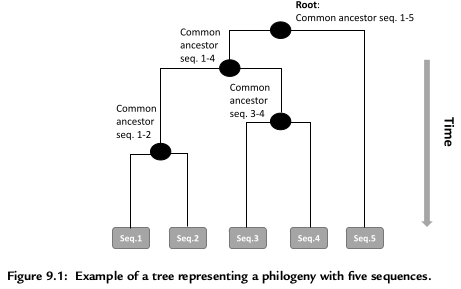

http://tolweb.org/tree/  гэх зэрэг зарим сонирхолтой төслүүд нь дэлхий дээрх бүх амьд организмуудын глобал филогенийг үүсгэхийг оролддог.

**30 дараалалаас 10 ийн 40 зэрэг орчим хувилбарын мод гарна**

## 2. Филогенетикийн Шинжилгээний алгоритмуудын анги(Classes of Algorithms for Phylogenetic Analysis)

**Филогенетик шинжилгээний алгоритмуудыг зорилгын функцийг тооцоолох стратегиас хамаарч ангилдаг.**
    
- **Distance-based алгоритмууд:**
    - Дарааллууд дээрх **хоёрлосон зайн (pairwise distance)** матрицын тооцооолол дээр суурилдаг.
    - Оролтын матриц дахь зайтай нийцэж байгаа модыг хайж олох;
- **Maximum parsimony:**
    - Дарааллуудын ялгааг тайлбарлахад зориулан мутацийн тоог хамгийн бага байх модыг олох.
- **Statistical/Bayesian аргууд:**
    - Төрөл төрлийн мутаци үүсгэх магадлалтай загваруудыг тодорхойлж,
    - Дээрх магадлалд үндэслэсэн модыг байгуулахад тус загваруудыг ашиглах,
    - Таамагласан загварын дагуу дарааллыг тайлбарлах хамгийн их магадлалтай модыг хайж олдог.

## 3. Distance-Based аргачилал

**Объектив функц: Дараалал зэрэгцүүлэх замаар модон дахь навчнуудын хоорондох
зай(distance)-н тогтворжилтыг хэмжинэ.**

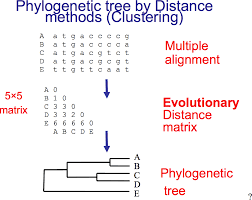

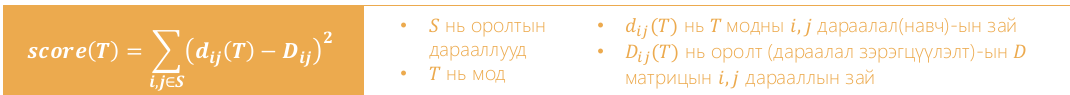

### UPGMA (Unweighted Pair Group Method Using Arithmetic Averages)

**Практикт хэрэглэдэг ихэнх алгоритмууд нь хьюристик буюу тухайн асуудлын ихэнх тохиолдлын хувьд практикт боломжтой шийдлүүдийг өгдөг байна.**

https://en.wikipedia.org/wiki/UPGMA

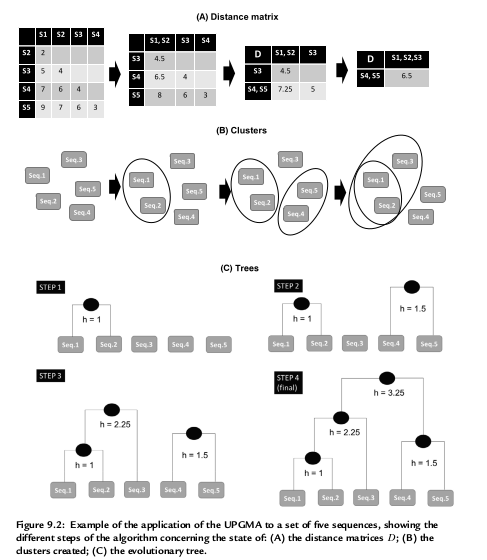

## Binary Tree

In [2]:
# BinaryTree класс - рекурсив:
#   value – бүхэл тоо, зангилаа бол −1, навч бол дарааллын индекс;
#   distance – зангилааны өндрийг хадгалах тоон утга (навч бол 0);
#   left ба right – зүүн ба баруун дэд мод; навч бол None байна.

class BinaryTree:

    def __init__(self, val, dist = 0, left = None, right = None):
        self.value = val
        self.distance = dist
        self.left = left
        self.right = right
    
    # Тухайн зангилаан доор ямар навч (дараалал) байгааг тодорхойлох
    #   - тухайн модонд харгалзах кластерыг буцааана.
    
    # Get_cluster: алгоритм зохиохдоо ерөнхий бүтэц нь хоёртын модоор дагадаг.
    #   • Зангилаа: эхлээд зүүн дэд модны методыг рекурсив байдлаар дуудаж, дараа нь үр дүнг
    #       нэгтгэн баруун модны аргыг дуудна (энэ тохиолдолд үр дүнгийн хоёр багцыг нэгтгэх);
    #   • Навч: үр дүнг буцаах рекурсийг дуусгах (энэ тохиолдолд нэг утгатай олонлог).

    def get_cluster(self):
        res = []
        if self.value >= 0:
            res.append(self.value)
        else:
            if (self.left != None):
                res.extend(self.left.get_cluster())
            if (self.right != None): 
                res.extend(self.right.get_cluster())
        return res
    
    def print_tree(self):
        self.print_tree_rec(0, "Root")
    
    def print_tree_rec(self, level, side):
        tabs = ""
        for i in range(level): tabs += "\t"
        if self.value >= 0:
            print(tabs, side, " - value:", self.value)
        else:
            print(tabs, side, "- Dist.: ", self.distance)
            if (self.left != None): 
                self.left.print_tree_rec(level+1, "Left")
            if (self.right != None): 
                self.right.print_tree_rec(level+1, "Right")
        
    # exercise 3a
    def size(self):
        numleafes = 0
        numnodes = 0
        if self.value >= 0:
            numleafes = 1
        else: 
            if (self.left != None):
                resl = self.left.size()
            else: resl = (0,0)
            if (self.right != None):  
                resr = self.right.size() 
            else: resr = (0,0)
            numnodes += (resl[0] + resr[0] + 1)
            numleafes += (resl[1] + resr[1])
        return numnodes, numleafes

    # exercise 3b
    def exists_leaf(self, leafnum):
        if self.value >= 0:
            if self.value == leafnum:
                return True
            else: return False
        else:
           if self.left != None:
               resl = self.left.exists_leaf(leafnum)
               if resl == True: return True
           if self.right != None:
               resr = self.right.exists_leaf(leafnum) 
               if resr == True: return True
        return False
    
    # exercise 3c
    def common_ancestor(self, leaf1, leaf2):
        if self.value >= 0: return None
        if self.left.exists_leaf(leaf1):
            if self.left.exists_leaf(leaf2):
                return self.left.common_ancestor(leaf1, leaf2)
            if self.right.exists_leaf(leaf2):
                return self
            return None       
        if self.right.exists_leaf(leaf1):
            if self.right.exists_leaf(leaf2):
                return self.right.common_ancestor(leaf1, leaf2)
            if self.left.exists_leaf(leaf2):
                return self
        return None
    
    # exercise 3e
    def distance_leaves(self, leafnum1, leafnum2):
        ca = self.common_ancestor(leafnum1, leafnum2)
        return 2*ca.distance
                
def test():
    a = BinaryTree(1)
    b = BinaryTree(2)
    c = BinaryTree(3)
    d = BinaryTree(4)
    e = BinaryTree(-1, 2.0, b, c)
    f = BinaryTree(-1, 1.5, d, a)
    g = BinaryTree(-1, 4.5, e, f)
    g.print_tree()
    print()
    print(g.size()) 
    print(f.get_cluster())
    print(g.get_cluster())    
    
test()

 Root - Dist.:  4.5
	 Left - Dist.:  2.0
		 Left  - value: 2
		 Right  - value: 3
	 Right - Dist.:  1.5
		 Left  - value: 4
		 Right  - value: 1

(3, 4)
[4, 1]
[2, 3, 4, 1]


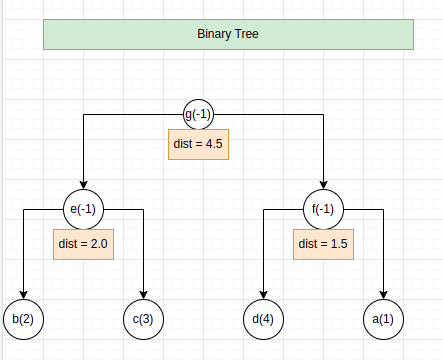

## NumMatrix

In [2]:
# Оролт нь зайны матрицыг хадгалах, удирдах боломжийг олгох NumMatrix класс.
#   - мөр/баганын тоо буцаах, мөр ба баганын индексээр утгуудад хандах/тохируулах, матрицыг хэвлэх, 
#     мөр/багана нэмэх, хасах, матрицын хуулбарыг буцаах.
#   - min_dist_indexes: Матрицын мөр, багануудын хамгийн бага утгыг буцаадаг (0-үүдийг орхино).
# Матриц нь гурвалжин хэлбэртэй тул зөвхөн мөрийн индекс нь баганын индексээс 
# их байх нүднүүдийг авч үзнэ (бусад нь 0).

class NumMatrix:

    def __init__(self, rows, cols):
        self.mat = []
        for i in range(rows):
            self.mat.append([])
            for j in range(cols):
                self.mat[i].append(0.0)

    def __getitem__(self, n):
        return self.mat[n]
        
    def num_rows (self):
        return len(self.mat)
    
    def num_cols (self):
        return len(self.mat[0])
    
    def get_value (self, i, j):
        if i>j: return self.mat[i][j]
        else: return self.mat[j][i]
    
    def set_value(self, i, j, value):
        if i>j: self.mat[i][j] = value
        else: self.mat[j][i] = value
    
    def print_mat(self):
        for r in self.mat: print(r)
        print()
    
    def min_dist_indexes (self):
        m = self.mat[1][0]
        res= (1,0)
        for i in range(1,self.num_rows()):
            for j in range(i):
                if self.mat[i][j] < m:
                    m = self.mat[i][j]
                    res = (i, j)
        return res
    
    def add_row(self, newrow):
        self.mat.append(newrow)

    def add_col(self, newcol):
        for r in range(self.num_rows()):
            self.mat[r].append(newcol[r])

    def remove_row(self, ind):
        del self.mat[ind]

    def remove_col(self, ind):
        for r in range(self.num_rows()):
            del self.mat[r][ind]

    def copy(self):
        newm = NumMatrix(self.num_rows(), self.num_cols())
        for i in range(self.num_rows()):
            for j in range(self.num_cols()):
                newm.mat[i][j] = self.mat[i][j]
        return newm
    

**Хуримтлан шаталсан кластер алгоритм**

- HierarchicalClustering.
    - Оролт болон зайн матрицын аттрибуттай.
- execute_clustering: Алгоритмыг ажиллуулж, үр дүнд нь хоёртын модыг буцаадаг үндсэн метод.
    - Модны олонлогийг эхлүүлэх
    - Навчнууд болон оролтын матрицыг үүсгэдэг.
- Үндсэн for цикл нь нэгтгэх кластеруудыг тодорхойлохоор матриц дахь хамгийн бага зайны индексүүдийг илрүүлдэг.

- Эдгээр хоёр кластертай харгалзсан мөчрүүдийг холбосон шинэ мод бий болно. Хэрэв энэ нь сүүлчийн давталт бол энэ модыг эцсийн үр дүн болгон буцаана.

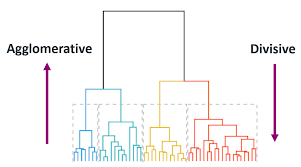

## HierarchicalCLustering

In [3]:
class HierarchicalClustering:

    def __init__(self, matdists):
        self.matdists = matdists
    
    def execute_clustering(self):
        trees = []
        tableDist = self.matdists.copy()
        for i in range(self.matdists.num_rows()):
            t = BinaryTree(i)
            trees.append(t)
        for k in range(self.matdists.num_rows(), 1, -1):
            mins = tableDist.min_dist_indexes()
            print("min",mins)
            i,j = mins[0], mins[1]
            n = BinaryTree(-1, tableDist.get_value(i, j)/2.0, trees[i], trees[j])
            print(n.get_cluster())
            if k>2:
                ti = trees.pop(i)
                tj = trees.pop(j)
                dists = []
                for x in range(tableDist.num_rows()):          
                    if x != i and x != j:
                        si = len(ti.get_cluster())
                        sj = len(tj.get_cluster())
                        d = (si*tableDist.get_value(i,x) + sj*tableDist.get_value(j,x)) / (si+sj)
                        dists.append(d)
                tableDist.remove_row(i)
                tableDist.remove_row(j)
                tableDist.remove_col(i)
                tableDist.remove_col(j)
                tableDist.add_row(dists)
                tableDist.add_col([0] * (len(dists)+1))
                trees.append(n)
            else: return n
            
def test():
    m = NumMatrix(5,5)
    m.set_value(0, 1, 2)
    m.set_value(0, 2, 5)
    m.set_value(0, 3, 7)
    m.set_value(0, 4, 9)
    m.set_value(1, 2, 4)
    m.set_value(1, 3, 6)
    m.set_value(1, 4, 7)
    m.set_value(2, 3, 4)
    m.set_value(2, 4, 6)
    m.set_value(3, 4, 3)
    m.print_mat()
    hc = HierarchicalClustering(m)
    arv = hc.execute_clustering()
    arv.print_tree()
    
if __name__ == '__main__': 
    test()

[0.0, 0.0, 0.0, 0.0, 0.0]
[2, 0.0, 0.0, 0.0, 0.0]
[5, 4, 0.0, 0.0, 0.0]
[7, 6, 4, 0.0, 0.0]
[9, 7, 6, 3, 0.0]

min (1, 0)
[1, 0]
min (2, 1)
[4, 3]
min (1, 0)
[1, 0, 2]
min (1, 0)
[1, 0, 2, 4, 3]
 Root - Dist.:  3.25
	 Left - Dist.:  2.25
		 Left - Dist.:  1.0
			 Left  - value: 1
			 Right  - value: 0
		 Right  - value: 2
	 Right - Dist.:  1.5
		 Left  - value: 4
		 Right  - value: 3


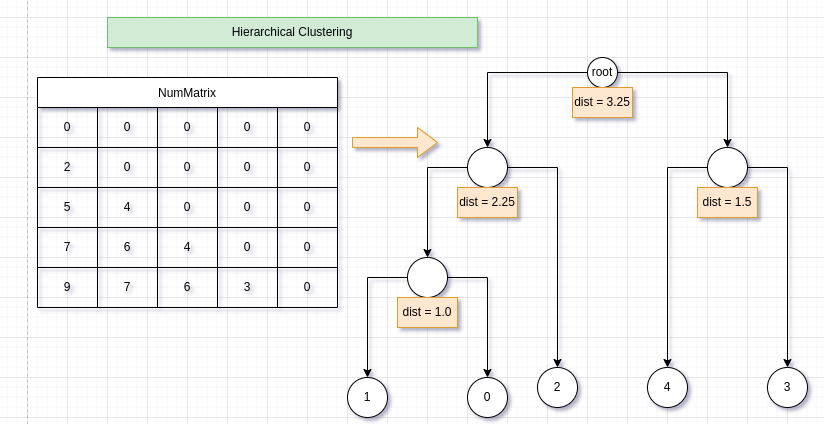

## MySeq

In [4]:
def translate_codon (cod):
    """Translates a codon into an aminoacid using an internal dictionary with the standard genetic code."""
    tc = {"GCT":"A", "GCC":"A", "GCA":"A", "GCG":"A", 
      "TGT":"C", "TGC":"C",
      "GAT":"D", "GAC":"D",
      "GAA":"E", "GAG":"E",
      "TTT":"F", "TTC":"F",
      "GGT":"G", "GGC":"G", "GGA":"G", "GGG":"G",
      "CAT":"H", "CAC":"H",
      "ATA":"I", "ATT":"I", "ATC":"I",
      "AAA":"K", "AAG":"K",
      "TTA":"L", "TTG":"L", "CTT":"L", "CTC":"L", "CTA":"L", "CTG":"L",
      "ATG":"M", "AAT":"N", "AAC":"N",
      "CCT":"P", "CCC":"P", "CCA":"P", "CCG":"P",
      "CAA":"Q", "CAG":"Q",
      "CGT":"R", "CGC":"R", "CGA":"R", "CGG":"R", "AGA":"R", "AGG":"R",
      "TCT":"S", "TCC":"S", "TCA":"S", "TCG":"S", "AGT":"S", "AGC":"S",
      "ACT":"T", "ACC":"T", "ACA":"T", "ACG":"T",
      "GTT":"V", "GTC":"V", "GTA":"V", "GTG":"V",
      "TGG":"W",
      "TAT":"Y", "TAC":"Y",
      "TAA":"_", "TAG":"_", "TGA":"_"}
    if cod in tc: return tc[cod]
    else: return None

class MySeq: 
    """ Class for biological sequences. """
    
    def __init__ (self, seq, seq_type = "DNA"): 
        self.seq = seq.upper()
        self.seq_type = seq_type

    def __len__(self):
        return len(self.seq)
    
    def __getitem__(self, n):
        return self.seq[n]

    def __getslice__(self, i, j):
        return self.seq[i:j]

    def __str__(self):
        return self.seq
        
    def get_seq_biotype (self):
        return self.seq_type
        
    def show_info_seq (self):
        print ("Sequence: " + self.seq + " biotype: " + self.seq_type)
        
    def alphabet (self):
        if (self.seq_type=="DNA"): return "ACGT"
        elif (self.seq_type=="RNA"): return "ACGU"
        elif (self.seq_type=="PROTEIN"): return "ACDEFGHIKLMNPQRSTVWY"
        else: return None
        
    def validate (self):
        alp = self.alphabet()
        res = True
        i = 0
        while i < len(self.seq) and res:
            if self.seq[i] not in alp: res = False
            else: i += 1
        return res 
        
    def transcription (self):
        if (self.seq_type == "DNA"):
            return MySeq(self.seq.replace("T","U"), "RNA")
        else:
            return None
    
    def reverse_comp (self):
        if (self.seq_type != "DNA"): return None
        comp = ""
        for c in self.seq:
            if (c == 'A'): comp = "T" + comp 
            elif (c == "T"): comp = "A" + comp 
            elif (c == "G"): comp = "C" + comp
            elif (c== "C"): comp = "G" + comp
        return MySeq(comp, "DNA")
        
    def translate (self, iniPos= 0):
        if (self.seq_type != "DNA"): return None
        seq_aa = ""
        for pos in range(iniPos,len(self.seq)-2,3):
            cod = self.seq[pos:pos+3]
            seq_aa += translate_codon(cod)
        return MySeq(seq_aa, "PROTEIN")      
        
if __name__ == "__main__":   
    s1 = MySeq("ATGTGATAAGAATAGAATGCTGAATAAATAGAATGACAT")
    s2 = MySeq("MKVVLSVQERSVVSLL", "PROTEIN")
    print(s1.validate(), s2.validate())
    print(s1)
    s3 = s1.transcription()
    s3.show_info_seq()
    s4 = s1.reverse_comp().translate()
    s4.show_info_seq()

True True
ATGTGATAAGAATAGAATGCTGAATAAATAGAATGACAT
Sequence: AUGUGAUAAGAAUAGAAUGCUGAAUAAAUAGAAUGACAU biotype: RNA
Sequence: MSFYLFSILFLSH biotype: PROTEIN


## My Align

In [5]:
# al_type - төрөл (ДНХ, РНХ, уураг)
# listseqs - дарааллын жагсаалт
# string, зайг "-"

class MyAlign:

    # init obj
    def __init__(self, lseqs, al_type = "protein"):
        self.listseqs = lseqs
        self.al_type = al_type
    
    # seq 1 iin urt
    # ooroor helbel number of columns
    def __len__(self): 
        return len(self.listseqs[0])
    
    # 
    def __getitem__(self, n):
        if type(n) is tuple and len(n) == 2: 
            i, j = n
            return self.listseqs[i][j]
        elif type(n) is int: return self.listseqs[n]
        return None
    
    # listiig haritsuulj harah
    def __str__(self):
        res = ""
        for seq in self.listseqs:
            res += "\n" + seq 
        return res
    
    # listiin urtiig 
    # matrix = 2
    def num_seqs(self):
        return len(self.listseqs)
   
    # indice = 2
    # ATGA-A
    # AA-AT-
    # return [G, -]
    def column (self, indice):
        res = []
        for k in range(len(self.listseqs)):
            res.append(self.listseqs[k][indice])
        return res
    
    # Бас нэг чухал метод бол Зэрэгцүүлэлтийн тогтворжон хэлбэрийг үүсгэх тооцоолол
    # Тогтворжсон хэлбэрийг зэрэгцүүлэлтийн багана бүрийн хувьд зайг тооцоогүй хамгийн өндөр
    # давтамжтай тэмдэгтүүдийн дараалалаар илэрхийлнэ.
    # Энэ метод нь dictionary ашиглан багана бүрийн тэмдэгтүүдийн давтамжийг тоолж, хамгийн олныг сонгоно
    # ATGA-A
    # AA-AT-
    # ATGATA <--return
    def consensus (self):
        cons = ""
        for i in range(len(self)):
            cont = {}
            for k in range(len(self.listseqs)):
                c = self.listseqs[k][i]
                if c in cont:
                    cont[c] = cont[c] + 1
                else: 
                    cont[c] = 1
            maximum = 0
            cmax = None
            for ke in cont.keys():
                if ke != "-" and cont[ke] > maximum: 
                    maximum = cont[ke]
                    cmax = ke
            cons = cons + cmax
        return cons

alig = MyAlign(["ATGA-A","AA-AT-"],"dna")
print("columnii urt: ", alig.__len__());
#print(alig)
#print(len(alig))
#print(alig.column(2))
#print(alig[1,1])
#print(alig[0])
#print("str: ",alig.__str__())
print(alig.consensus())

columnii urt:  6
ATGATA


## SubstMatrix

In [6]:
class SubstMatrix:

    def __init__(self):
        self.alphabet = ""
        self.sm = {}
        
    def __getitem__(self, ij):
        i, j = ij
        return self.score_pair(i, j)
    
    def score_pair(self, c1, c2):
        if c1 not in self.alphabet or c2 not in self.alphabet:
            return None
        return self.sm[c1+c2]
        
    def read_submat_file(self, filename, sep):
        f = open(filename, "r")
        line = f.readline()
        tokens = line.split(sep)
        ns = len(tokens)
        self.alphabet = ""
        for i in range(0, ns): 
            self.alphabet += tokens[i][0]
        for i in range(0,ns):
            line = f.readline();
            tokens = line.split(sep);
            for j in range(0, len(tokens)):
                k = self.alphabet[i]+self.alphabet[j]
                self.sm[k] = int(tokens[j])
        f.close()
        return None
                
    def create_submat(self, match, mismatch, alphabet):
        self.alphabet = alphabet
        for c1 in alphabet:
            for c2 in alphabet:
                if (c1 == c2):
                    self.sm[c1+c2] = match
                else:
                    self.sm[c1+c2] = mismatch
        return None
    

def test1():
    sm = SubstMatrix()
    sm.read_submat_file("files/blosum62.mat", "\t")
    print(sm.alphabet)
    print(sm.score_pair("G", "M"))
    print(sm.score_pair("W", "W"))
    print(sm.score_pair("A", "S"))
    print(sm.score_pair("X", "X"))
    print(sm["G","K"])
    print(sm["T","T"])


def test2():
    sm = SubstMatrix()
    sm.create_submat(3, -1, "ACGU")
    print(sm.alphabet)
    print(sm.score_pair("A", "A"))
    print(sm.score_pair("A", "U"))
    print(sm.score_pair("T", "T"))
    print(sm["G","G"])


if __name__ == "__main__":   
    test1()
    print()
    test2()

ARNDCQEGHILKMFPSTWYV
-3
11
1
None
-2
5

ACGU
3
-1
None
3


## PairwiseAlignment

In [7]:
class PairwiseAlignment:

    def __init__(self, sm, g):
        self.g = g
        self.sm = sm
        self.S = None
        self.T = None
        self.seq1 = None
        self.seq2 = None
        
    def score_pos (self, c1, c2):
        if c1 == "-" or c2=="-":
            return self.g
        else:
            return self.sm[c1,c2]
        
    def score_alin (self, alin):
        res = 0;
        for i in range(len(alin)):
            res += self.scorePos (alin[0][i], alin[1][i])
        return res
    
    def needleman_Wunsch (self, seq1, seq2):
        if (seq1.seq_type != seq2.seq_type): return None
        self.S = [[0]]
        self.T = [[0]]
        self.seq1 = seq1
        self.seq2 = seq2
        for j in range(1, len(seq2)+1):
            self.S[0].append(self.g * j)
            self.T[0].append(3)
        for i in range(1, len(seq1)+1):
            self.S.append([self.g * i])
            self.T.append([2])
        for i in range(0, len(seq1)):
            for j in range(len(seq2)):
                s1 = self.S[i][j] + self.score_pos (seq1[i], seq2[j])
                s2 = self.S[i][j+1] + self.g
                s3 = self.S[i+1][j] + self.g
                self.S[i+1].append(max(s1, s2, s3))
                self.T[i+1].append(max3t(s1, s2, s3))
        return self.S[len(seq1)][len(seq2)]
    
    def recover_align (self):
        res = ["", ""]
        i = len(self.seq1)
        j = len(self.seq2)
        while i>0 or j>0:
            if self.T[i][j]==1:
                res[0] = self.seq1[i-1] + res[0]
                res[1] = self.seq2[j-1] + res[1]
                i -= 1
                j -= 1
            elif self.T[i][j] == 3:
                res[0] = "-" + res[0]
                res[1] = self.seq2[j-1] + res[1] 
                j -= 1
            else:
                res[0] = self.seq1[i-1] + res[0]
                res[1] = "-" + res[1]
                i -= 1
        return MyAlign(res, self.seq1.seq_type)
     
    def smith_Waterman (self, seq1, seq2):
        if (seq1.seq_type != seq2.seq_type): return None
        self.S = [[0]]
        self.T = [[0]]
        self.seq1 = seq1
        self.seq2 = seq2
        maxscore = 0
        for j in range(1, len(seq2)+1):
            self.S[0].append(0)
            self.T[0].append(0)
        for i in range(1, len(seq1)+1):
            self.S.append([0])
            self.T.append([0])
        for i in range(0, len(seq1)):
            for j in range(len(seq2)):
                s1 = self.S[i][j] + self.score_pos(seq1[i], seq2[j]) 
                s2 = self.S[i][j+1] + self.g
                s3 = self.S[i+1][j] + self.g
                b = max(s1, s2, s3)
                if b <= 0:
                    self.S[i+1].append(0)
                    self.T[i+1].append(0)
                else:
                    self.S[i+1].append(b)
                    self.T[i+1].append(max3t(s1, s2, s3))
                    if b > maxscore: 
                        maxscore = b
        return maxscore

    def recover_align_local (self):
        res = ["", ""]
        maxscore = 0
        maxrow = 0
        maxcol = 0
        for i in range(1,len(self.S)):
            for j in range(1, len(self.S[i])):
                if self.S[i][j] > maxscore:
                    maxscore = self.S[i][j]
                    maxrow = i
                    maxcol = j
        i = maxrow
        j = maxcol
        while i>0 or j>0:
            if self.T[i][j]==1:
                res[0] = self.seq1[i-1] + res[0]
                res[1] = self.seq2[j-1] + res[1]
                i -= 1
                j -= 1
            elif self.T[i][j] == 3:
                res[0] = "-" + res[0];
                res[1] = self.seq2[j-1] + res[1]; 
                j -= 1
            elif self.T[i][j] == 2:
                res[0] = self.seq1[i-1] + res[0];
                res[1] = "-" + res[1]; 
                i -= 1
            else: break
        return MyAlign(res, self.seq1.seq_type)


def max3t (v1, v2, v3):
    if v1 > v2:
        if v1 > v3: return 1
        else: return 3
    else:
        if v2 > v3: return 2
        else: return 3

def printMat (mat):
    for i in range(0, len(mat)):
        print(mat[i])

def test():
    seq1 = MySeq("ATGATATGATGATT")
    seq2 = MySeq("GATGAATAGATGTGT")
    sm = SubstMatrix()
    sm.create_submat(3, -1, "ACGT")
    alin = PairwiseAlignment(sm, -3)
    print(alin.smith_Waterman(seq1, seq2))
    printMat(alin.S)
    print(alin.recover_align_local())
    
    print(alin.needleman_Wunsch(seq1,seq2))
    printMat(alin.S)
    print(alin.recover_align())
    

if __name__ == "__main__":   

    test()


25
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0]
[0, 0, 0, 6, 3, 0, 2, 6, 3, 2, 0, 6, 3, 3, 0, 3]
[0, 3, 0, 3, 9, 6, 3, 3, 5, 6, 3, 3, 9, 6, 6, 3]
[0, 0, 6, 3, 6, 12, 9, 6, 6, 4, 9, 6, 6, 8, 5, 5]
[0, 0, 3, 9, 6, 9, 11, 12, 9, 6, 6, 12, 9, 9, 7, 8]
[0, 0, 3, 6, 8, 9, 12, 10, 15, 12, 9, 9, 11, 8, 8, 6]
[0, 0, 0, 6, 5, 7, 9, 15, 12, 14, 11, 12, 9, 14, 11, 11]
[0, 3, 0, 3, 9, 6, 6, 12, 14, 15, 13, 10, 15, 12, 17, 14]
[0, 0, 6, 3, 6, 12, 9, 9, 15, 13, 18, 15, 12, 14, 14, 16]
[0, 0, 3, 9, 6, 9, 11, 12, 12, 14, 15, 21, 18, 15, 13, 17]
[0, 3, 0, 6, 12, 9, 8, 10, 11, 15, 13, 18, 24, 21, 18, 15]
[0, 0, 6, 3, 9, 15, 12, 9, 13, 12, 18, 15, 21, 23, 20, 17]
[0, 0, 3, 9, 6, 12, 14, 15, 12, 12, 15, 21, 18, 24, 22, 23]
[0, 0, 0, 6, 8, 9, 11, 17, 14, 11, 12, 18, 20, 21, 23, 25]

ATGATAT-GATGATT
ATGA-ATAGATGTGT
22
[0, -3, -6, -9, -12, -15, -18, -21, -24, -27, -30, -33, -36, -39, -42, -45]
[-3, -1, 0, -3, -6, -9, -12, -15, -18, -21, -24, -27, -30, -33, 

**Main class**

- Эцэст нь биологийн дараалалд дээр тодорхойлсон ерөнхий шаталсан кластерийн алгоритмыг хэрэглэх UPGMA ангиллыг тодорхойлох болно.

- Энэ анги нь модны навч (өмнө нь тодорхойлсон MySeq ангийн объектууд), зэрэгцүүлэх параметрүүд(PairwiseAlignment ангийн объект) болон зайны матриц (NumMatrix ангийн объект) зэрэг олон дарааллыг хадгалах шинж чанаруудтай байх болно.

- Доорх кодонд бид global хэмжээнд тохируулсны дараа (Needleman-Wunsch аргатай) хоёр дарааллын хоорондох ялгаатай тэмдэгтүүдийн тооноос бүрдэх зайны хэмжүүрийг харгалзан энэ ангийн хэрэгжилтийг харуулж байна.

- Үүнийг matdist ангиллын хувьсагчийг дүүргэх create_mat_dist аргаар тооцдог.

- Энэ функцийг өөрчлөх эсвэл солих замаар бид бусад зайны хэмжүүрүүдийг хялбархан үүсгэж болохыг анхаарна уу.

- Run аргыг HierarchicalClustering ангийн объектыг үүсгэж, кластерын алгоритмыг гүйцэтгэж, үүссэн модыг буцаахад ашигладаг.



## UPGMA ALGORITHM

In [8]:
# Биологийн дараалалд дээр тодорхойлсон шаталсан кластерийн генетик алгоритмыг хэрэглэх UPGMA класс.
#   - модны навч (өмнө нь тодорхойлсон MySeq объектууд),
#   - зэрэгцүүлэлтийн параметрүүд(PairwiseAlignment объект) 
#   - зайны матриц (NumMatrix объект)

# Глобал зэрэгцүүлэлтийн дараа (Needleman-Wunsch) хоёр дарааллын хоорондох ялгаатай тэмдэгтүүдийн
# тооноос бүрдэх зайн хэмжигдэхүүний хэрэгжилтыг харуулна
#   - Үүнийг create_mat_dist методоор тооцоолж matdist класс хувьсагчид хадгална.
#   - Функцийг өөрчлөх/солих замаар бусад зайны хэмжигдэхүүнийг хялбар үүсгэж болно.

class UPGMA:

    def __init__(self, seqs, alseq):
        self.seqs = seqs
        self.alseq = alseq
        self.create_mat_dist()
        
    def create_mat_dist(self):
        self.matdist = NumMatrix(len(self.seqs), len(self.seqs))
        for i in range(len(self.seqs)):
            for j in range(i, len(self.seqs)):
                s1 = self.seqs[i]
                s2 = self.seqs[j]
                self.alseq.needleman_Wunsch(s1, s2)
                alin = self.alseq.recover_align()
                ncd = 0
                for k in range(len(alin)):
                    col = alin.column(k)
                    if (col[0] != col[1]): ncd += 1
                self.matdist.set_value(i, j, ncd)
        print("Matrix: ")
        self.matdist.print_mat()
    # гun метод нь HierarchicalClustering классын объектыг үүсгэж, кластерын алгоритмыг гүйцэтгэж, үүссэн
    # модыг буцаана.
    def run(self):
        ch = HierarchicalClustering(self.matdist)
        t = ch.execute_clustering()
        return t

def test():
    seq1 = MySeq("ATAGCGAT")    
    seq2 = MySeq("ATAGGCCT")    
    seq3 = MySeq("CTAGGCCC")
    seq4 = MySeq("CTAGGCCT")    
    sm = SubstMatrix()    
    sm.create_submat(1, -1, "ACGT")    
    alseq = PairwiseAlignment(sm, -2)    
    up  = UPGMA([seq1, seq2, seq3, seq4], alseq)    
    arv = up.run()    
    arv.print_tree() 

test()

Matrix: 
[0, 0.0, 0.0, 0.0]
[3, 0, 0.0, 0.0]
[5, 2, 0, 0.0]
[4, 1, 1, 0]

min (3, 1)
[3, 1]
min (2, 1)
[3, 1, 2]
min (1, 0)
[3, 1, 2, 0]
 Root - Dist.:  2.0
	 Left - Dist.:  0.75
		 Left - Dist.:  0.5
			 Left  - value: 3
			 Right  - value: 1
		 Right  - value: 2
	 Right  - value: 0


#  Exercises

1. Consider the sequences of the first exercise of the previous chapter. Assume that the mul-tiple sequence alignment obtained was the following:

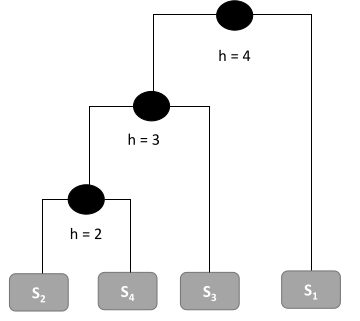

S1: A-CATATC-AT-

S2: A-GATATT-AG-

S3: AACAGATC-T--

S4: G-CAT--CGATT

a. Assuming the metric distance to be the number of distinct characters in pairwise alignment, and taking the pairwise alignments imposed by the multiple alignment above, calculate the distance matrix.

b. Apply the algorithm UPGMA to build the tree for these sequences.

c. Write a Python script that allows you to check your results.

In [9]:
def exercise1():
    s1 = MySeq("ACATATCAT")
    s2 = MySeq("AACAGATCT")
    s3 = MySeq("AGATATTAG")
    s4 = MySeq("GCATCGATT")
    
    sm = SubstMatrix()
    sm.create_submat(1,-1,"ACGT")
    aseq = PairwiseAlignment(sm,-1)

    up  = UPGMA([s1, s2, s3, s4], aseq)    
    arv = up.run()    
    arv.print_tree()

exercise1()

Matrix: 
[0, 0.0, 0.0, 0.0]
[3, 0, 0.0, 0.0]
[3, 6, 0, 0.0]
[5, 5, 6, 0]

min (1, 0)
[1, 0]
min (2, 0)
[1, 0, 2]
min (1, 0)
[1, 0, 2, 3]
 Root - Dist.:  2.6666666666666665
	 Left - Dist.:  2.25
		 Left - Dist.:  1.5
			 Left  - value: 1
			 Right  - value: 0
		 Right  - value: 2
	 Right  - value: 3


2. 
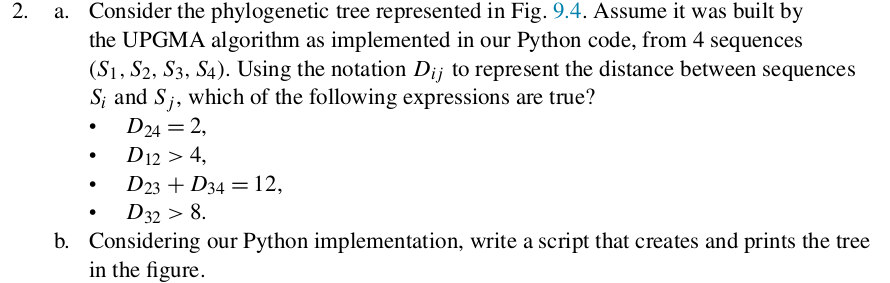

In [11]:
pass

3. Considering the class BinaryTree implemented in this chapter, add methods that:

    a. Return the size of the tree, which will be given by a tuple with two values: the num-ber of internal nodes of the tree, the number of leaves.
    
    b. Search if there is a leaf that contains a given value passed as a parameter of the method. The result should be a Boolean value (True if the value exists; False, oth-erwise).
    
    c. Return the common ancestor of two sequences/taxa (identified as integer values),i.e. will return the simplest tree (with less height) that contains the leaves with those values.
    
    d. Generalize the previous function to a set of sequences as input.
    
    e. Return the distance between two leaves identified by their integer values.
    
    f. Return the distance between the two leaves (identified by their integer values) that are nearest in the tree (i.e. have their common ancestor at the smallest height).

In [10]:
    # Binary Tree d baigaa method - uud
    '''
    # 3a     
    def size(self):
        numleafes = 0
        numnodes = 0
        if self.value >= 0: 
            numleafes = 1
        else: 
            # zangilaa bol numLeaf numNode iin utagiig awna
            if (self.left != None): 
                resl = self.left.size()
            # leaf bol 
            else: resl = (0,0)
            if (self.right != None):  
                resr = self.right.size() 
            else: resr = (0,0)
            numnodes += (resl[0] + resr[0] + 1)
            numleafes += (resl[1] + resr[1])
        return numnodes, numleafes

    # 3b
    # leaf mony? argument valueg ni awna
    def exists_leaf(self, leafnum):
        if self.value >= 0:
            if self.value == leafnum:
                return True
            else: return False
        else:
           if self.left != None:
               resl = self.left.exists_leaf(leafnum)
               if resl == True: return True
           if self.right != None:
               resr = self.right.exists_leaf(leafnum) 
               if resr == True: return True
        return False
    
    # 3c
    def common_ancestor(self, leaf1, leaf2):
        if self.value >= 0: return None
        if self.left.exists_leaf(leaf1):
            if self.left.exists_leaf(leaf2):
                return self.left.common_ancestor(leaf1, leaf2)
            if self.right.exists_leaf(leaf2):
                return self
            return None       
        if self.right.exists_leaf(leaf1):
            if self.right.exists_leaf(leaf2):
                return self.right.common_ancestor(leaf1, leaf2)
            if self.left.exists_leaf(leaf2):
                return self
        return None
    
    # 3e
    def distance_leaves(self, leafnum1, leafnum2):
        ca = self.common_ancestor(leafnum1, leafnum2)
        return 2*ca.distance
    '''
a = BinaryTree(1)
b = BinaryTree(2)
c = BinaryTree(3)
d = BinaryTree(4)
e = BinaryTree(-1, 2.0, b, c)
f = BinaryTree(-1, 1.5, d, a)
g = BinaryTree(-1, 4.5, e, f)
g.print_tree()
#print(g.get_cluster())

print()
print("size: ")
print(g.size()) # num nodes, num leafs

print()
print("exists leaf ")
# leaf mony? argument valueg ni awna
print("1: ", g.exists_leaf(1)) 
print("5: ", g.exists_leaf(5))

print()

print("common ancestor: ")
g.common_ancestor(1,4).print_tree()

print()
print("distance leaves: ")
print(g.distance_leaves(1,4))
print(g.distance_leaves(1,2))

 Root - Dist.:  4.5
	 Left - Dist.:  2.0
		 Left  - value: 2
		 Right  - value: 3
	 Right - Dist.:  1.5
		 Left  - value: 4
		 Right  - value: 1

size: 
(3, 4)

exists leaf 
1:  True
5:  False

common ancestor: 
 Root - Dist.:  1.5
	 Left  - value: 4
	 Right  - value: 1

distance leaves: 
3.0
9.0


4. Implement the WPGMA variant of the UPGMA algorithm, changing the way the dis-tance between clusters is calculated (as described above). Compare the results of both approaches.

5. Consider the last exercise of the previous chapter. Read the tree obtained from Clustal Omega. Draw the tree with the Bio.Phylo module. Explore the tree using the available functions.

In [ ]:
3 April 2022, 10:48 PM
￼ Lab4.pdf3 April 2022, 10:48 PM
